1️⃣ Setup & Imports


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For reproducibility
np.random.seed(42)



2️⃣ Generate Sample Large Datasets


In [2]:


num_customers = 10_000
customer_ids = np.arange(1000, 1000 + num_customers)

# Demographics
customers = pd.DataFrame({
    'customer_id': customer_ids,
    'age': np.random.randint(18, 65, size=num_customers),
    'gender': np.random.choice(['M', 'F'], size=num_customers),
    'city': np.random.choice(['Karachi', 'Lahore', 'Islamabad', 'Peshawar', 'Quetta'], size=num_customers),
    'income_bracket': np.random.choice(['Low', 'Medium', 'High'], size=num_customers, p=[0.4, 0.4, 0.2])
})

# Recharge data: 1–5 recharges per customer
recharge_records = []
for cid in customer_ids:
    n_recharges = np.random.randint(1, 6)
    for _ in range(n_recharges):
        recharge_records.append({
            'customer_id': cid,
            'recharge_amount': np.random.choice([50, 100, 200, 300, 500, 1000]),
            'recharge_date': pd.to_datetime('2024-01-01') + pd.to_timedelta(np.random.randint(0,180), unit='D')
        })
recharges = pd.DataFrame(recharge_records)

# Usage data (monthly aggregates, e.g., for June 2024)
usage = pd.DataFrame({
    'customer_id': customer_ids,
    'data_usage_mb': np.random.gamma(2, 1000, size=num_customers).astype(int),
    'voice_minutes': np.random.gamma(2, 200, size=num_customers).astype(int),
    'sms_count': np.random.poisson(20, size=num_customers),
    'usage_date': pd.to_datetime('2024-06-30')
})


3️⃣ Preview the Data



In [3]:
print(customers.head())


   customer_id  age gender    city income_bracket
0         1000   56      M  Lahore           High
1         1001   46      M  Lahore           High
2         1002   32      F  Lahore            Low
3         1003   60      F  Lahore            Low
4         1004   25      F  Quetta         Medium


In [4]:
print(recharges.head())


   customer_id  recharge_amount recharge_date
0         1000              100    2024-06-25
1         1000             1000    2024-05-13
2         1000              200    2024-06-03
3         1000              300    2024-05-05
4         1000               50    2024-06-16


In [5]:
print(usage.head())


   customer_id  data_usage_mb  voice_minutes  sms_count usage_date
0         1000           1322            207         17 2024-06-30
1         1001           4711            400         23 2024-06-30
2         1002           2579            267         25 2024-06-30
3         1003           3131            363         26 2024-06-30
4         1004            859            419         21 2024-06-30


4️⃣ Join Recharge & Usage



In [6]:

recharge_usage = pd.merge(recharges, usage, on="customer_id", how="inner")


5️⃣ Join with Demographics



In [7]:

full_data = pd.merge(recharge_usage, customers, on="customer_id", how="left")


6️⃣ Calculate ARPU (Average Revenue Per User)


In [8]:

total_revenue = recharges['recharge_amount'].sum()
total_users = recharges['customer_id'].nunique()
arpu = total_revenue / total_users

print(f"Average Revenue Per User (ARPU): PKR {arpu:.2f}")


Average Revenue Per User (ARPU): PKR 1069.43


7️⃣ Rank Top 5 Most Valuable Customers


In [9]:

top5 = (
    recharges.groupby('customer_id')['recharge_amount']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)
print("Top 5 Most Valuable Customers:")
print(top5)


Top 5 Most Valuable Customers:
customer_id
2883     4500
1218     4500
4074     4500
10741    4500
7394     4300
Name: recharge_amount, dtype: int64


8️⃣ Analyze Usage by City



In [10]:

city_usage = (
    full_data.groupby("city")[["data_usage_mb", "voice_minutes", "sms_count"]]
    .mean()
    .round(2)
)
print("\nAverage Usage by City:")
print(city_usage)



Average Usage by City:
           data_usage_mb  voice_minutes  sms_count
city                                              
Islamabad        1968.12         407.25      20.24
Karachi          2064.28         397.00      19.96
Lahore           1963.21         395.42      19.93
Peshawar         1905.23         395.48      20.02
Quetta           1968.09         392.63      19.94


9️⃣ Visualize Recharge Distribution


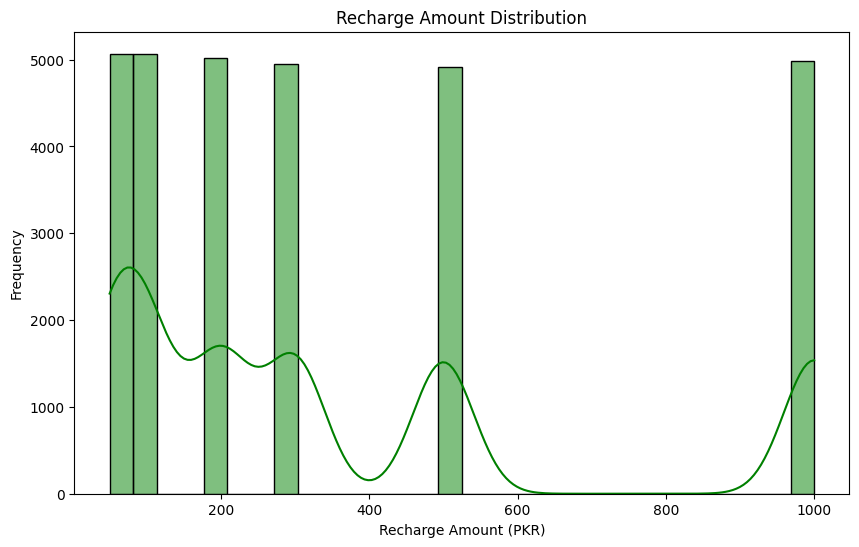

In [11]:

plt.figure(figsize=(10,6))
sns.histplot(recharges["recharge_amount"], bins=30, kde=True, color="green")
plt.title("Recharge Amount Distribution")
plt.xlabel("Recharge Amount (PKR)")
plt.ylabel("Frequency")
plt.show()


🔟 Visualize Average Data Usage by City



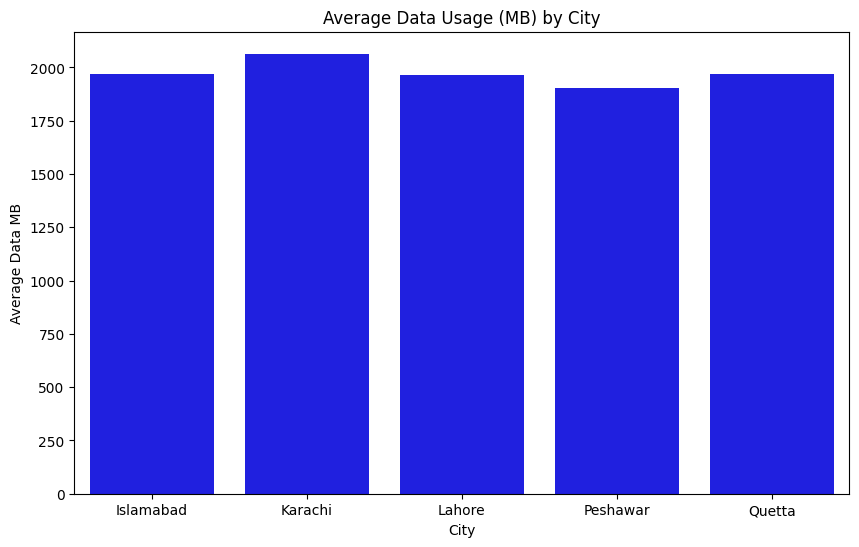

In [12]:

plt.figure(figsize=(10,6))
sns.barplot(x=city_usage.index, y=city_usage["data_usage_mb"], color="blue")
plt.title("Average Data Usage (MB) by City")
plt.ylabel("Average Data MB")
plt.xlabel("City")
plt.show()
